# Problem Statement:

Details of a segment of learners of an online learning platform offering Software Development courses are given and we need to cluster the learners on the basis of their job profile, company, and other features which we can use to  identify the best companies and job positions to work for.

Concepts Used: Manual Clustering, Unsupervised Clustering - K-means, Hierarchical Clustering

In [ ]:
import pandas as pd
import numpy as np
import re

## Structure of dataset

In [ ]:
df=pd.read_csv("clustering.csv")
df.head()

In [ ]:
print(df.shape)

(205843, 7)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153279 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [ ]:
df['job_position'].value_counts()

job_position
Backend Engineer                 43554
FullStack Engineer               24717
Other                            18071
Frontend Engineer                10417
Engineering Leadership            6870
                                 ...  
PhD. Student                         1
Front-End Developer                  1
ayS                                  1
Principal Product Engineer           1
Android Application developer        1
Name: count, Length: 1016, dtype: int64

## Data Preprocessing

In [ ]:
df.drop(columns=['email_hash','Unnamed: 0'],inplace=True)

In [ ]:
df['job_position'].nunique()

1016

In [ ]:
def preprocess_string(string):
    new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
    return new_string

df.job_position=df.job_position.apply(lambda x: preprocess_string(str(x)))
df.job_position.nunique()

856

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(188246, 5)

In [ ]:
df['company_hash'].value_counts().sort_index()

company_hash
0                                 2
0000                              1
01 ojztqsj                        2
05mz exzytvrny uqxcvnt rxbxnta    2
1                                 2
                                 ..
zyvzwt wgzohrnxzs tzsxzttqo       1
zz                                2
zzb ztdnstz vacxogqj ucn rna      2
zzgato                            1
zzzbzb                            1
Name: count, Length: 37299, dtype: int64

In [ ]:
df.company_hash.nunique()

37299

In [ ]:
df.company_hash=df.company_hash.apply(lambda x: preprocess_string(str(x)))
df.company_hash.nunique()

37208

In [ ]:
df['company_hash'].value_counts().sort_index()

company_hash
                                                85
a                                                1
a b onttr wgqu                                   1
a j uvnxr owyggr ge tzsxzttqxzs vwvatbj vbmx     1
a ntwy ogrhnxgzo ucn rna                         2
                                                ..
zz                                               2
zz wgzztwn mya                                   1
zzb ztdnstz vacxogqj ucn rna                     2
zzgato                                           1
zzzbzb                                           1
Name: count, Length: 37208, dtype: int64

In [ ]:
#removing rows where company or job_position is not available
df=df[ ~((df['company_hash']=='') | (df['job_position']==''))]

In [ ]:
## Missing value treatment using Median imputation
df['orgyear'].isnull().sum()

86

In [ ]:
df['orgyear'].fillna(df.groupby('company_hash')['orgyear'].transform('median'), inplace=True)

In [ ]:
df['orgyear'].isnull().sum()

26

In [ ]:
df = df.loc[~df['orgyear'].isna()]

In [ ]:
df['orgyear'].isnull().sum()

0

In [ ]:
## Checking for outliers
df['orgyear'].value_counts()

orgyear
2018.0    22157
2016.0    21477
2017.0    21320
2015.0    19613
2019.0    18550
          ...  
2107.0        1
1972.0        1
2101.0        1
206.0         1
200.0         1
Name: count, Length: 79, dtype: int64

In [ ]:
df.orgyear.describe()

count    188126.000000
mean       2014.613995
std          66.472920
min           0.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max       20165.000000
Name: orgyear, dtype: float64

In [ ]:
df['orgyear'] = df['orgyear'].clip(lower=df.orgyear.quantile(0.01), upper=df.orgyear.quantile(0.99))
df['ctc'] = df['ctc'].clip(lower=df.ctc.quantile(0.01), upper=df.ctc.quantile(0.99))

<ipython-input-93-da7511c5fe38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['orgyear'] = df['orgyear'].clip(lower=df.orgyear.quantile(0.01), upper=df.orgyear.quantile(0.99))
<ipython-input-93-da7511c5fe38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ctc'] = df['ctc'].clip(lower=df.ctc.quantile(0.01), upper=df.ctc.quantile(0.99))


In [ ]:
#Removing 'nan's from job_position
df.loc[df['job_position']=='nan', 'job_position']=np.nan

In [ ]:
df['company_hash'].value_counts()

company_hash
nvnv wgzohrnvzwj otqcxwto     4284
xzegojo                       3043
vbvkgz                        3005
wgszxkvzn                     2262
zgn vuurxwvmrt vwwghzn        2207
                              ... 
nojo wvqa ntwy                   1
wtzwgoha ov                      1
sgzxjg                           1
ozvu gz mhoxztoo ogrhnxgzo       1
bvptbjnqxu td vbvkgz             1
Name: count, Length: 37180, dtype: int64

In [ ]:
## Masking companies by renaming it to "other" having count<5

df.loc[df.groupby('company_hash')['ctc'].transform('count') < 5, 'company_hash'] = 'Others'

In [ ]:
df['orgyear'].describe()

count    188126.000000
mean       2014.891357
std           4.138710
min        2000.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2021.000000
Name: orgyear, dtype: float64

In [ ]:
## Creating years of experience column
df['years_of_experience']=2024-df['orgyear']

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(166851, 6)

In [ ]:
df=df[~df['years_of_experience'].isnull()]

In [ ]:
#update cant be before joining
df['ctc_updated_year'] = df[['ctc_updated_year', 'orgyear']].max(axis=1)

In [ ]:
#Filling remaining null values with others
df['job_position'] = df['job_position'].fillna('Others')
df['company_hash'] = df['company_hash'].fillna('Others')

In [ ]:
df.isnull().sum()

company_hash           0
orgyear                0
ctc                    0
job_position           0
ctc_updated_year       0
years_of_experience    0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(165721, 6)

In [ ]:
df.describe()

,orgyear,ctc,ctc_updated_year,years_of_experience
count,165721.000000,1.657210e+05,165721.000000,165721.000000
mean,2014.784526,1.539199e+06,2019.583746,9.215474
std,4.187307,1.836945e+06,1.325783,4.187307
min,2000.000000,3.000000e+04,2015.000000,3.000000
25%,2013.000000,6.000000e+05,2019.000000,6.000000
50%,2016.000000,1.040000e+06,2020.000000,8.000000
75%,2018.000000,1.800000e+06,2021.000000,11.000000
max,2021.000000,1.500000e+07,2021.000000,24.000000


# Manual Clustering

In [ ]:
## Manual clustering based on company, job position, years of experience
grouped_c_j_y = df.groupby(['years_of_experience','job_position','company_hash'])['ctc'].describe()
grouped_c_j_y

In [ ]:
df_cjy=df.merge(grouped_c_j_y, on=['years_of_experience','job_position','company_hash'], how='left')
df_cjy

In [ ]:
## Creating designation based on the ctc they have in their respective company.

def segment(a,b_50,b_75):
    if a<b_50:
        return 3
    elif a>=b_50 and a<=b_75:
        return 2

    elif a>=b_75:
        return 1

df_cjy['designation'] =df_cjy.apply(lambda x: segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_cjy.head()

In [ ]:
df_cjy.designation.value_counts(normalize=True)

designation
2    0.453630
3    0.333193
1    0.213178
Name: proportion, dtype: float64

In [ ]:
## Manual clustering based on company and job position
grouped_c_j=df.groupby(['job_position','company_hash'])['ctc'].describe()
grouped_c_j.head()

In [ ]:
df_cj=df.merge(grouped_c_j, on=['job_position','company_hash'], how='left')
df_cj.head()

In [ ]:
df_cj['class'] = df_cj.apply(lambda x: segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_cj.head()

In [ ]:
df_cj['class'].value_counts(normalize=True)

class
3    0.435135
2    0.320412
1    0.244453
Name: proportion, dtype: float64

In [ ]:
# job position that has the highest class
df_cj[df_cj['class']==1][['job_position','ctc']].groupby('job_position')['ctc'].describe().sort_values(by=['count','mean'],ascending=False)[:10]

,count,mean,std,min,25%,50%,75%,max
job_position,,,,,,,,
backend engineer,9237.0,3.146579e+06,2.571010e+06,50000.0,1700000.0,2400000.0,3700000.0,15000000.0
Others,9163.0,2.980927e+06,2.645259e+06,50000.0,1500000.0,2250000.0,3400000.0,15000000.0
fullstack engineer,5188.0,2.800158e+06,2.675664e+06,59000.0,1426000.0,2000000.0,3000000.0,15000000.0
other,3493.0,3.209997e+06,3.758033e+06,72000.0,1200000.0,1880000.0,3000000.0,15000000.0
frontend engineer,2169.0,2.428533e+06,2.589030e+06,90000.0,1300000.0,1700000.0,2400000.0,15000000.0
engineering leadership,1513.0,5.082294e+06,3.073236e+06,200000.0,3300000.0,4100000.0,5500000.0,15000000.0
qa engineer,1380.0,2.293655e+06,2.631809e+06,65000.0,1000000.0,1500000.0,2555000.0,15000000.0
data scientist,1143.0,2.995843e+06,2.488414e+06,115000.0,1705000.0,2300000.0,3200000.0,15000000.0
sdet,1066.0,2.087732e+06,1.914372e+06,400000.0,950000.0,1600000.0,2500000.0,15000000.0


In [ ]:
df_cj.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)
df_cjy.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)

In [ ]:
df_cj.head()

In [ ]:
df_cjy.head()

In [ ]:
df_cjy_cj=df_cj.merge(df_cjy, on=['company_hash','orgyear','ctc','job_position','years_of_experience','ctc_updated_year'], how='left')
df_cjy_cj.head()

In [ ]:
## Manual clustering based on company
grouped_c = df.groupby(['company_hash'])['ctc'].describe()
df_c = df.merge(grouped_c, on=['company_hash'], how='left')
df_c.head()

In [ ]:
df_c['tier'] =df_c.apply(lambda x: segment(x['ctc'],x['50%'],x['75%']),axis=1)
df_c.head()

In [ ]:
df_c.tier.value_counts(normalize=True)

tier
3    0.477115
2    0.282420
1    0.240464
Name: proportion, dtype: float64

In [ ]:
df_cjy_cj_c=df_cjy_cj.merge(df_c, on=['company_hash','orgyear','ctc','job_position','years_of_experience','ctc_updated_year'], how='left')
df_cjy_cj_c.head()

In [ ]:
df_cjy_cj_c.drop(columns=['count','mean','std','min','25%','50%','75%','max'],inplace=True)
df_cjy_cj_c.head()

In [ ]:
df_cjy_cj_c.columns

Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'years_of_experience', 'class', 'designation', 'tier'],
      dtype='object')

In [ ]:
# Top 10 employees (earning more than most of the employees in the company)
df_cjy_cj_c[df_cjy_cj_c['tier']==1].sort_values(['ctc'],ascending=False)[:10]

In [ ]:
# Top 10 employees of data science in Amazon / TCS etc earning more than their peers
df_cjy_cj_c[(df_cjy_cj_c['class']==1) & (df_cjy_cj_c['company_hash']=='cbfvqt')].sort_values(['ctc'],ascending=False)[:10]

In [ ]:
# Bottom 10 employees of data science in Amazon / TCS etc earning less than their peers
df_cjy_cj_c[(df_cjy_cj_c['class']==3) & (df_cjy_cj_c['company_hash']=='cbfvqt')].sort_values(['ctc'])[:10]

In [ ]:
# Bottom 10 employees (earning less than most of the employees in the company)
df_cjy_cj_c[df_cjy_cj_c['tier']==3].sort_values(['ctc'])[:10]

In [ ]:
# Top 10 employees in Amazon- X department - having 5/6/7 years of experience earning more than their peers - Tier X
temp=df_cjy_cj_c[(df_cjy_cj_c['class']==1) & (df_cjy_cj_c['company_hash']=='cbfvqt')].sort_values(['ctc'],ascending=False)
temp[(temp['years_of_experience']>=5) & (temp['years_of_experience']<=7)]

In [ ]:
# Top 10 companies (based on their CTC)
df_c[['company_hash','max']].sort_values(by='max',ascending=False).value_counts()[:10]

company_hash               max       
Others                     15000000.0    26349
nvnv wgzohrnvzwj otqcxwto  15000000.0     4191
xzegojo                    15000000.0     2999
vbvkgz                     15000000.0     2975
wgszxkvzn                  15000000.0     2243
zgn vuurxwvmrt vwwghzn     15000000.0     2159
gqvwrt                     15000000.0     2108
vwwtznhqt                  15000000.0     2102
bxwqgogen                  15000000.0     1956
fxuqg rxbxnta              15000000.0     1822
Name: count, dtype: int64

In [ ]:
# Top 2 positions in every company (based on their CTC)
temp=df_cj.sort_values(by='ctc',ascending=False).groupby(['company_hash']).head(2)
temp[['company_hash','job_position','ctc']].sort_values('company_hash')

In [ ]:
X = df_cjy_cj_c[['ctc', 'years_of_experience', 'class', 'designation', 'tier']].copy()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_sc = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

In [ ]:
X_sc.shape

(165721, 5)

Text(0, 0.5, 'distance')

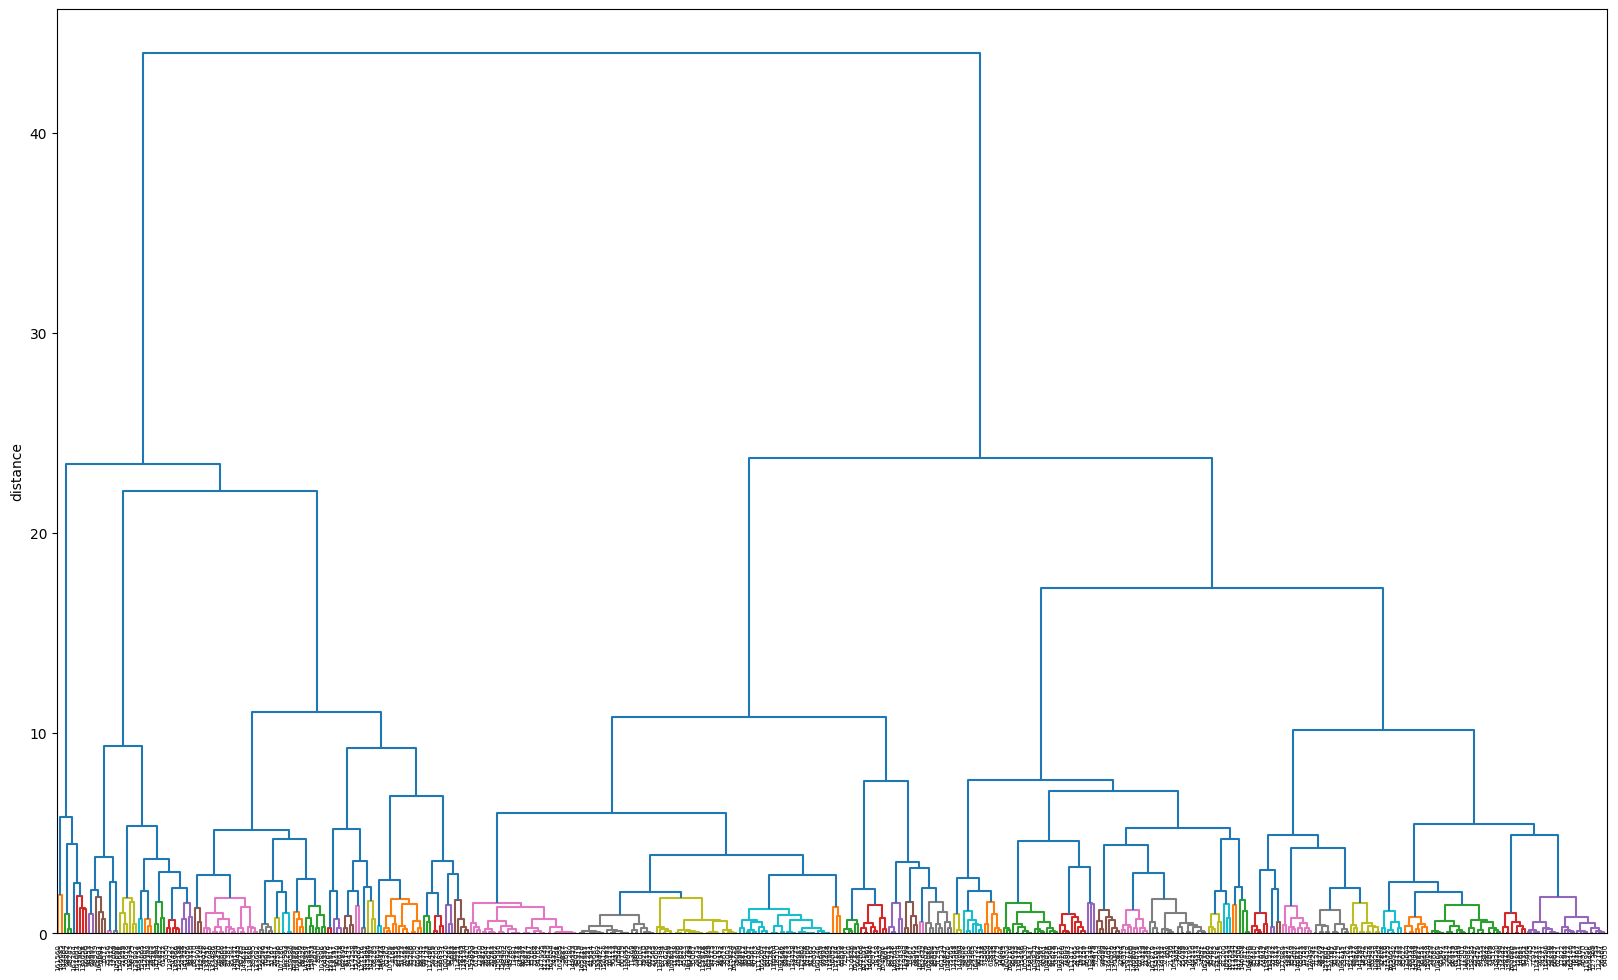

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

In [ ]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_sc)

##coordinates of the cluster centers
# kmeans.cluster_centers_
clusters = pd.DataFrame(X_sc, columns=X.columns)
clusters['label'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
X_sc.columns

Index(['ctc', 'years_of_experience', 'class', 'designation', 'tier'], dtype='object')

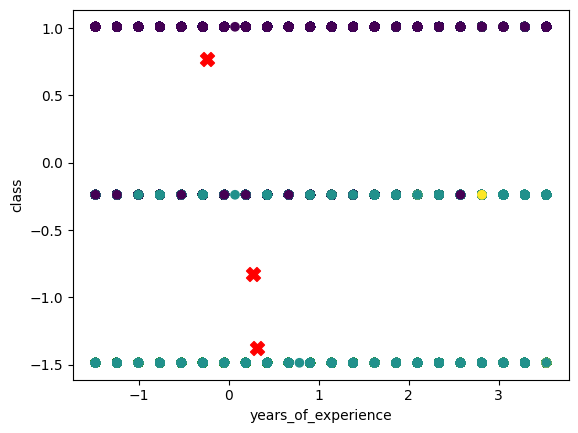

In [ ]:
x_axis = 'years_of_experience'
y_axis = 'class'

plt.scatter(clusters[x_axis], clusters[y_axis], c=clusters['label'], )
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], color="red", marker="X", s=100)
plt.xlabel(x_axis)
plt.ylabel(y_axis);

## Insights and Recommendations

-> Top Paying job positions are 'Engineering Leadership', 'Backend Engineer', 'Product Manager', 'Program Manager', 'SDET', 'QA Engineer', 'Data Scientist', 'Android Engineer' and 'FullStack Engineer'.

Freshers who want to work on technical side should look for roles like Backend Engineer, SDET, QA engineer, Dataa Scientist, Android Engineer,Full stack engineer to get good salaries as expirience increases.

-> Top paying companies are nvnv wgzohrnvzwj otqcxwto, xzegojo,vbvkgz. Freshers who want best pay should aim for these companies.